In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
df = pd.read_csv("netflix_customer_churn.csv")

# See first 5 rows
df.head()

,customer_id,age,gender,subscription_type,watch_hours,last_login_days,region,device,monthly_fee,churned,payment_method,number_of_profiles,avg_watch_time_per_day,favorite_genre
0,a9b75100-82a8-427a-a208-72f24052884a,51,Other,Basic,14.73,29,Africa,TV,8.99,1,Gift Card,1,0.49,Action
1,49a5dfd9-7e69-4022-a6ad-0a1b9767fb5b,47,Other,Standard,0.70,19,Europe,Mobile,13.99,1,Gift Card,5,0.03,Sci-Fi
2,4d71f6ce-fca9-4ff7-8afa-197ac24de14b,27,Female,Standard,16.32,10,Asia,TV,13.99,0,Crypto,2,1.48,Drama
3,d3c72c38-631b-4f9e-8a0e-de103cad1a7d,53,Other,Premium,4.51,12,Oceania,TV,17.99,1,Crypto,2,0.35,Horror
4,4e265c34-103a-4dbb-9553-76c9aa47e946,56,Other,Standard,1.89,13,Africa,Mobile,13.99,1,Crypto,2,0.13,Action


In [ ]:
# See columns and data types
df.info()

# statistics
df.describe(include="all").T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   customer_id             5000 non-null   object 
 1   age                     5000 non-null   int64  
 2   gender                  5000 non-null   object 
 3   subscription_type       5000 non-null   object 
 4   watch_hours             5000 non-null   float64
 5   last_login_days         5000 non-null   int64  
 6   region                  5000 non-null   object 
 7   device                  5000 non-null   object 
 8   monthly_fee             5000 non-null   float64
 9   churned                 5000 non-null   int64  
 10  payment_method          5000 non-null   object 
 11  number_of_profiles      5000 non-null   int64  
 12  avg_watch_time_per_day  5000 non-null   float64
 13  favorite_genre          5000 non-null   object 
dtypes: float64(3), int64(4), object(7)
memor

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
customer_id,5000,5000,82aeef39-ddb0-40ad-bae1-5c436e0cf042,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,5000.0,NaN,NaN,NaN,43.8474,15.501128,18.0,30.0,44.0,58.0,70.0
gender,5000,3,Female,1711,NaN,NaN,NaN,NaN,NaN,NaN,NaN
subscription_type,5000,3,Premium,1693,NaN,NaN,NaN,NaN,NaN,NaN,NaN
watch_hours,5000.0,NaN,NaN,NaN,11.64945,12.014654,0.01,3.3375,8.0,16.03,110.4
last_login_days,5000.0,NaN,NaN,NaN,30.0898,17.536078,0.0,15.0,30.0,45.0,60.0
region,5000,6,South America,873,NaN,NaN,NaN,NaN,NaN,NaN,NaN
device,5000,5,Tablet,1048,NaN,NaN,NaN,NaN,NaN,NaN,NaN
monthly_fee,5000.0,NaN,NaN,NaN,13.6834,3.692062,8.99,8.99,13.99,17.99,17.99
churned,5000.0,NaN,NaN,NaN,0.503,0.500041,0.0,0.0,1.0,1.0,1.0


In [ ]:
df.columns

Index(['customer_id', 'age', 'gender', 'subscription_type', 'watch_hours',
       'last_login_days', 'region', 'device', 'monthly_fee', 'churned',
       'payment_method', 'number_of_profiles', 'avg_watch_time_per_day',
       'favorite_genre'],
      dtype='object')

In [ ]:
# Selecting only numeric columns
numeric_df = df.select_dtypes(include=['int64', 'float64'])

# Checking Numeric columns
numeric_df.columns


Index(['age', 'watch_hours', 'last_login_days', 'monthly_fee', 'churned',
       'number_of_profiles', 'avg_watch_time_per_day'],
      dtype='object')

In [ ]:
correlations = numeric_df.corr()["churned"].sort_values(ascending=False)
print(correlations)


churned                   1.000000
last_login_days           0.471590
age                      -0.003515
monthly_fee              -0.152117
number_of_profiles       -0.158614
avg_watch_time_per_day   -0.272958
watch_hours              -0.479916
Name: churned, dtype: float64


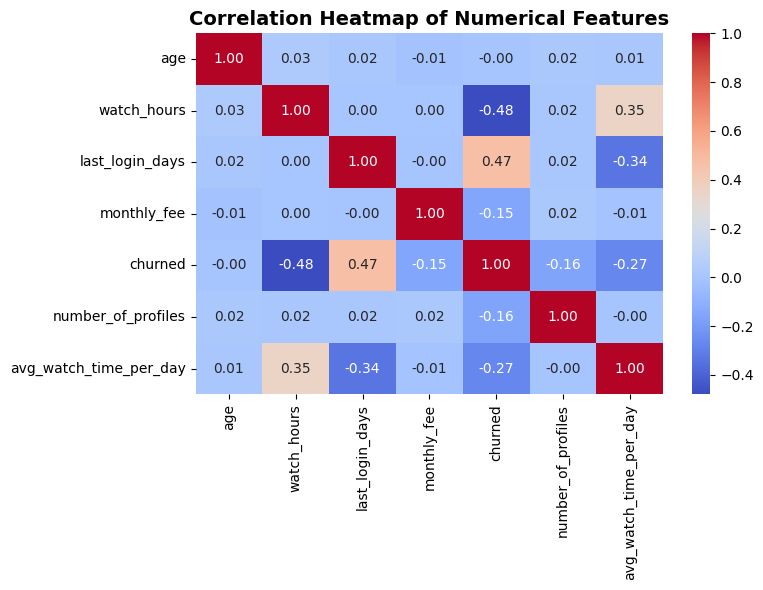

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select only numeric columns
numeric_df = df.select_dtypes(include=['int64', 'float64'])

# Plotting correlation heatmap
plt.figure(figsize=(8,6))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Numerical Features", fontsize=14, weight='bold')
plt.tight_layout()
plt.show()


In [ ]:
#Correlation analysis revealed that reduced login activity and lower viewing hours are the strongest indicators of churn, suggesting that engagement frequency is a key driver of retention

In [ ]:
import pandas as pd

feature_importances = pd.DataFrame({
    "feature": X_encoded.columns,
    "importance": rf.feature_importances_
}).sort_values(by="importance", ascending=False)

feature_importances.head(10)

,feature,importance
5,avg_watch_time_per_day,0.375306
1,watch_hours,0.203436
2,last_login_days,0.175428
4,number_of_profiles,0.064898
3,monthly_fee,0.027191
0,age,0.026299
19,payment_method_Crypto,0.016749
21,payment_method_Gift Card,0.014594
9,subscription_type_Standard,0.008395
8,subscription_type_Premium,0.007997


In [ ]:
# Identifying target column
target_column = "churned"

# Need to identify unecessary column
id_columns = ["customer_id"]

# Features (X) and target (y)
X = df.drop(columns=id_columns + [target_column])
y = df[target_column]

In [ ]:
# Convert all categorical columns into dummy/one-hot variables
X_encoded = pd.get_dummies(X, drop_first=True)

X_encoded.head()


,age,watch_hours,last_login_days,monthly_fee,number_of_profiles,avg_watch_time_per_day,gender_Male,gender_Other,subscription_type_Premium,subscription_type_Standard,...,payment_method_Crypto,payment_method_Debit Card,payment_method_Gift Card,payment_method_PayPal,favorite_genre_Comedy,favorite_genre_Documentary,favorite_genre_Drama,favorite_genre_Horror,favorite_genre_Romance,favorite_genre_Sci-Fi
0,51,14.73,29,8.99,1,0.49,False,True,False,False,...,False,False,True,False,False,False,False,False,False,False
1,47,0.70,19,13.99,5,0.03,False,True,False,True,...,False,False,True,False,False,False,False,False,False,True
2,27,16.32,10,13.99,2,1.48,False,False,False,True,...,True,False,False,False,False,False,True,False,False,False
3,53,4.51,12,17.99,2,0.35,False,True,True,False,...,True,False,False,False,False,False,False,True,False,False
4,56,1.89,13,13.99,2,0.13,False,True,False,True,...,True,False,False,False,False,False,False,False,False,False


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y,
    test_size=0.2,
    random_state=42,
    stratify=y  # keeping class balance
)

X_train.shape, X_test.shape

((4000, 29), (1000, 29))

In [ ]:
rf = RandomForestClassifier(
    n_estimators=100,
    random_state=42
)

rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
y_pred = rf.predict(X_test)

# Accuracy
acc = accuracy_score(y_test, y_pred)
print("Accuracy:", acc)

# Detailed report
print(classification_report(y_test, y_pred))

Accuracy: 0.981
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       497
           1       0.98      0.98      0.98       503

    accuracy                           0.98      1000
   macro avg       0.98      0.98      0.98      1000
weighted avg       0.98      0.98      0.98      1000



In [ ]:
#The Random Forest classifier achieved an overall accuracy of 98.1%, with both precision and recall at 0.98. This indicates that the model is highly effective in identifying churned customers without misclassifying loyal users. The balanced dataset (497 non-churned vs 503 churned) ensures that the model’s performance is not biased toward any class. Such reliability makes it a strong predictive tool for customer retention strategies.